# Pymaceuticals Inc.
---

### Analysis

In reviewing the data results, we are able to see that Capomulin and Ramicane has simliar and better results in their Mean Tumor Volume, Median Tumor Volumes,	Tumor Volume Variance, TumorVolume Std.Dev., and TumorVolume Std. Err.compared to other drug regimens. They also had more mice in their test results due to their drug regimen's effectiveness.

In the boxplot image, we can see that Capomulin has more results that are more consisted and compacted. Ramicanes tumor values and weight spread out a bit more. 

In looking at mouse l509, we see that the mouse starts with a tumor mass over 40mm3 that reduces to almost half by timepoint 48. Interesting is that it shows a zero volume at timepoint 45.

There's a positive correlation between weigh of mice as it increases with growth of the tumor and reduces when the tumor reduces. There is no data to show if sex affected results, however we had slighly less females at 49%.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge both files together on mouse id
mouse_study_data=pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study_data["Mouse ID"].unique())
mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_listed=mouse_study_data[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"])]
dupes_listed

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=mouse_study_data.loc[mouse_study_data["Mouse ID"] != "g989"]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(clean_mouse_data["Mouse ID"].unique())
mouse_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

per_regimen_mean= clean_mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
per_regimen_median=clean_mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
per_regimen_variance = clean_mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
per_regimen_std = clean_mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
per_regimen_sem = clean_mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
per_regimen_summary=pd.DataFrame({"Mean Tumor Volume":per_regimen_mean,
                                 "Median Tumor Volumes":per_regimen_median,
                                 "Tumor Volume Variance":per_regimen_variance,
                                  "TumorVolume Std.Dev.":per_regimen_std,
                                 "TumorVolume Std. Err.": per_regimen_sem})
per_regimen_summary


,Mean Tumor Volume,Median Tumor Volumes,Tumor Volume Variance,TumorVolume Std.Dev.,TumorVolume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
per_regimen_single_summary = clean_mouse_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var', 'std','sem']})

per_regimen_single_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

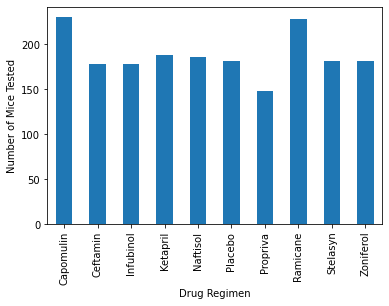

In [9]:
#group mouse data for charts
mouse_time_data = clean_mouse_data.groupby(["Drug Regimen"]).count()["Timepoint"]
#mouse_time_data

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#mouse_time_data.sort_values("Timepoint")
ax=mouse_time_data.plot.bar(x= "Drug Regimen", y='Timepoint')
ax.set_ylabel("Number of Mice Tested")


In [10]:
#Create data frame
mouse_time_data2=pd.DataFrame(clean_mouse_data.groupby(["Drug Regimen"]).count())
mouse_time_data2['Drug Regimen'] = mouse_time_data2.index
#mouse_time_data2

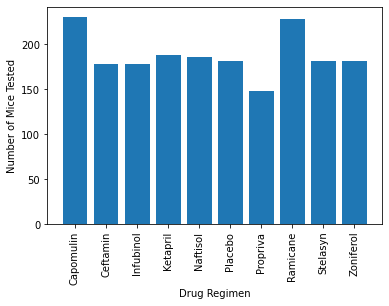

In [21]:
plt.bar(mouse_time_data2['Drug Regimen'], mouse_time_data2['Timepoint'])
plt.xticks(rotation='vertical')
#plt.title('Drug Regimen', loc='center', y=-0.4)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.savefig("../Barchart2.png")
plt.show()



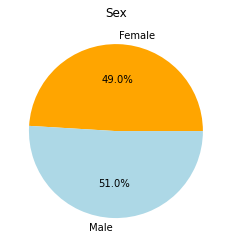

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#mouse_sex_data= clean_mouse_data.groupby(["Sex"]).count()["Mouse ID"]
#mouse_sex_data = mouse_sex_data.div(clean_mouse_data.count()["Mouse ID"])

mouse_sex_data= (clean_mouse_data.groupby(["Sex"]).count()["Mouse ID"]).div(clean_mouse_data.count()["Mouse ID"])*100
#mouse_sex_data.head()

mouse_sex_data.plot.pie(label="",autopct="%1.1F%%",title="Sex",colors=["orange","lightblue"],)


Text(0.5, 1.0, 'Sex')

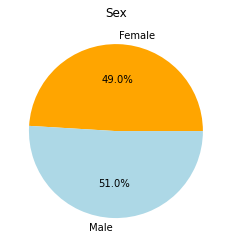

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

my_colors=['orange','lightblue']
plt.pie(mouse_sex_data, labels=["Female", "Male"], autopct='%1.1f%%', colors=my_colors)
plt.savefig("../Pie2.png")
plt.title("Sex")



## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timept=clean_mouse_data.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_last_timepoint=pd.merge(clean_mouse_data, greatest_timept, left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])

filter_by_drug =mouse_last_timepoint[mouse_last_timepoint["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol","Ceftamin"])]
filter_by_drug


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    print(treatment)
    results = filter_by_drug.loc[filter_by_drug['Drug Regimen'] == treatment]

    quartile=results["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])

    lowerq=quartile[0.25]
    upperq=quartile[0.75]
    iqr=upperq-lowerq

    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    
    print(f"The lower quartile of our data is: {lowerq}")
    print(f"The upper quartile of our data is: {upperq}")
    print(f"The interquartile range of our data is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")    
    print(f"Values below {upper_bound} could be outliers.")
    
    outlier_results = filter_by_drug.loc[(filter_by_drug["Tumor Volume (mm3)"] < lower_bound)| (filter_by_drug["Tumor Volume (mm3)"] > upper_bound)]
    #print(f"Potential outliers include: {outlier_results=outlier_results["Tumor Volume (mm3)"].index})
    

Capomulin
The lower quartile of our data is: 32.37735684
The upper quartile of our data is: 40.1592203
The interquartile range of our data is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values below 51.83201549 could be outliers.
Ramicane
The lower quartile of our data is: 31.56046955
The upper quartile of our data is: 40.65900627
The interquartile range of our data is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values below 54.30681135 could be outliers.
Infubinol
The lower quartile of our data is: 54.04860769
The upper quartile of our data is: 65.52574285
The interquartile range of our data is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values below 82.74144559000001 could be outliers.
Ceftamin
The lower quartile of our data is: 48.72207785
The upper quartile of our data is: 64.29983003
The interquartile range of our data is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values below 

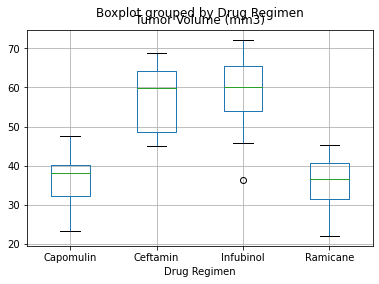

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
pltchart= filter_by_drug.boxplot(column= "Tumor Volume (mm3)", by="Drug Regimen")
plt.savefig("../boxplot.png")
plt.show()


## Line and Scatter Plots

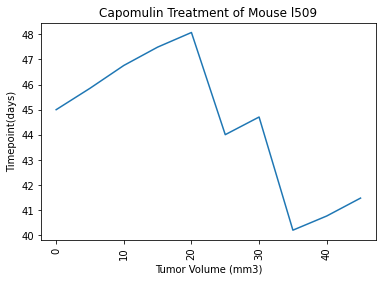

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_results = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_results = capomulin_results.loc[capomulin_results['Mouse ID'] == 'l509']
capomulin_results= capomulin_results.sort_values(["Timepoint"])


plt.plot(capomulin_results['Timepoint'], capomulin_results['Tumor Volume (mm3)'])
plt.xticks(rotation='vertical')
plt.title("Capomulin Treatment of Mouse l509", loc='center')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint(days)')
plt.show()
plt.savefig("../linemousel509.png")

In [18]:
#get average Tumor volume for Capomulin 
mouse_weight = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
mouse_count = len(mouse_weight["Mouse ID"].unique())
mouse_weight = mouse_weight.groupby(["Mouse ID"]).mean()
mouse_weight

#mouse_time_data2['Drug Regimen'] = mouse_time_data2.index

#capomulin_weight_results= clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
#capomulin_weight_results = clean_mouse_data.loc[clean_mouse_data['Weight (g)'].sort_values(['Tumor Volume (mm3)'])
#mouse_weight=clean_mouse_data.groupy["Weight (g)"],["Tumor Volume(mm3)"]
#mouse_weight


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


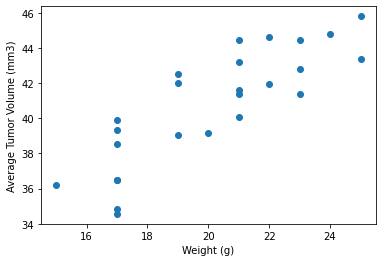

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.savefig("../scatter1.png")

## Correlation and Regression

The r-squared is 0.7088568047708717
The correlation between mouse weight and the average tumor volume is 0.84


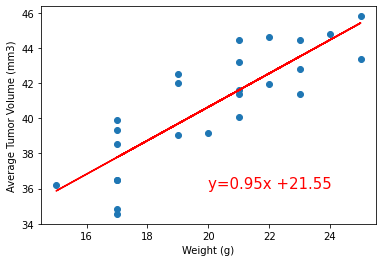

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=mouse_weight['Weight (g)']
y_values=mouse_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue,pvalue,stderr) = st.linregress(mouse_weight['Weight (g)'], mouse_weight['Tumor Volume (mm3)'])
regress_values=x_values * slope + intercept
m=round(slope,2)
b=round(intercept,2)
line_eq=f"y={m}x +{b}"
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation=st.pearsonr(x_values,y_values)

print(f"The r-squared is {rvalue**2}")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.savefig("../corrandreg1.png")
plt.show()
